# Reversing the extracted SP500 Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
sp500 = pd.read_csv('sp500.csv')
sp500

,date,Open,High,Low,Close,Adj Close,Volume
0,"Jan 04, 2010",1116.56,1133.87,1116.56,1132.99,1132.99,3.991400e+09
1,"Jan 05, 2010",1132.66,1136.63,1129.66,1136.52,1136.52,2.491020e+09
2,"Jan 06, 2010",1135.71,1139.19,1133.95,1137.14,1137.14,4.972660e+09
3,"Jan 07, 2010",1136.27,1142.46,1131.32,1141.69,1141.69,5.270680e+09
4,"Jan 08, 2010",1140.52,1145.39,1136.22,1144.98,1144.98,4.389590e+09
...,...,...,...,...,...,...,...
2764,"Dec 24, 2020",3694.03,3703.82,3689.32,3703.06,3703.06,1.883780e+09
2765,"Dec 28, 2020",3723.03,3740.51,3723.03,3735.36,3735.36,3.535460e+09
2766,"Dec 29, 2020",3750.01,3756.12,3723.31,3727.04,3727.04,3.393290e+09
2767,"Dec 30, 2020",3736.19,3744.63,3730.21,3732.04,3732.04,3.154850e+09


In [5]:
sp500 = sp500[::-1]
sp500

,Date,Open,High,Low,Close*,Adj Close**,Volume
2768,"Jan 04, 2010","1,116.56","1,133.87","1,116.56","1,132.99","1,132.99","3,99,14,00,000"
2767,"Jan 05, 2010","1,132.66","1,136.63","1,129.66","1,136.52","1,136.52","2,49,10,20,000"
2766,"Jan 06, 2010","1,135.71","1,139.19","1,133.95","1,137.14","1,137.14","4,97,26,60,000"
2765,"Jan 07, 2010","1,136.27","1,142.46","1,131.32","1,141.69","1,141.69","5,27,06,80,000"
2764,"Jan 08, 2010","1,140.52","1,145.39","1,136.22","1,144.98","1,144.98","4,38,95,90,000"
...,...,...,...,...,...,...,...
4,"Dec 24, 2020","3,694.03","3,703.82","3,689.32","3,703.06","3,703.06","1,88,37,80,000"
3,"Dec 28, 2020","3,723.03","3,740.51","3,723.03","3,735.36","3,735.36","3,53,54,60,000"
2,"Dec 29, 2020","3,750.01","3,756.12","3,723.31","3,727.04","3,727.04","3,39,32,90,000"
1,"Dec 30, 2020","3,736.19","3,744.63","3,730.21","3,732.04","3,732.04","3,15,48,50,000"


In [9]:
sp500.rename(columns = {'Date':'date'}, inplace = True)
sp500.rename(columns = {'Close*':'Close'}, inplace = True)
sp500.rename(columns = {'Adj Close**':'Adj Close'}, inplace = True)

In [42]:
sp500["Open"] = [float(str(i).replace(",", "")) for i in sp500["Open"]]
sp500["High"] = [float(str(i).replace(",", "")) for i in sp500["High"]]
sp500["Low"] = [float(str(i).replace(",", "")) for i in sp500["Low"]]
sp500["Close"] = [float(str(i).replace(",", "")) for i in sp500["Close"]]
sp500["Adj Close"] = [float(str(i).replace(",", "")) for i in sp500["Adj Close"]]
sp500["Volume"] = [float(str(i).replace(",", "")) for i in sp500["Volume"]]

## Converting date to format (YYYY-MM-DD)

In [12]:
from datetime import datetime

In [27]:
sp500["date"] = [(str(i).replace(",", "")) for i in sp500["date"]]

In [28]:
sp500

,date,Open,High,Low,Close,Adj Close,Volume
0,Jan 04 2010,1116.56,1133.87,1116.56,1132.99,1132.99,3.991400e+09
1,Jan 05 2010,1132.66,1136.63,1129.66,1136.52,1136.52,2.491020e+09
2,Jan 06 2010,1135.71,1139.19,1133.95,1137.14,1137.14,4.972660e+09
3,Jan 07 2010,1136.27,1142.46,1131.32,1141.69,1141.69,5.270680e+09
4,Jan 08 2010,1140.52,1145.39,1136.22,1144.98,1144.98,4.389590e+09
...,...,...,...,...,...,...,...
2764,Dec 24 2020,3694.03,3703.82,3689.32,3703.06,3703.06,1.883780e+09
2765,Dec 28 2020,3723.03,3740.51,3723.03,3735.36,3735.36,3.535460e+09
2766,Dec 29 2020,3750.01,3756.12,3723.31,3727.04,3727.04,3.393290e+09
2767,Dec 30 2020,3736.19,3744.63,3730.21,3732.04,3732.04,3.154850e+09


In [31]:
sp500["date"] = pd.to_datetime(sp500["date"], infer_datetime_format=True)

In [32]:
sp500

,date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.56,1133.87,1116.56,1132.99,1132.99,3.991400e+09
1,2010-01-05,1132.66,1136.63,1129.66,1136.52,1136.52,2.491020e+09
2,2010-01-06,1135.71,1139.19,1133.95,1137.14,1137.14,4.972660e+09
3,2010-01-07,1136.27,1142.46,1131.32,1141.69,1141.69,5.270680e+09
4,2010-01-08,1140.52,1145.39,1136.22,1144.98,1144.98,4.389590e+09
...,...,...,...,...,...,...,...
2764,2020-12-24,3694.03,3703.82,3689.32,3703.06,3703.06,1.883780e+09
2765,2020-12-28,3723.03,3740.51,3723.03,3735.36,3735.36,3.535460e+09
2766,2020-12-29,3750.01,3756.12,3723.31,3727.04,3727.04,3.393290e+09
2767,2020-12-30,3736.19,3744.63,3730.21,3732.04,3732.04,3.154850e+09


## Extracting only the Close prices

In [33]:
sp500_close = sp500[['date','Close']]
sp500_close

,date,Close
0,2010-01-04,1132.99
1,2010-01-05,1136.52
2,2010-01-06,1137.14
3,2010-01-07,1141.69
4,2010-01-08,1144.98
...,...,...
2764,2020-12-24,3703.06
2765,2020-12-28,3735.36
2766,2020-12-29,3727.04
2767,2020-12-30,3732.04


In [34]:
sp500_close.dtypes

date     datetime64[ns]
Close           float64
dtype: object

In [35]:
sp500_close.isnull().sum()

date     0
Close    0
dtype: int64

In [36]:
sp500_close["Close"] = [float(str(i).replace(",", "")) for i in sp500_close["Close"]]

/home/amartyadutta/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
sp500_close.to_csv('sp500_close.csv', index = False)

In [38]:
mean_val = sp500_close['Close'].mean()
std_val = sp500_close['Close'].std()

### Normalizing the data

In [40]:
sp500_close['Close'] = (sp500_close['Close'] - mean_val )/ std_val

/home/amartyadutta/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
sp500_close

,date,Close
0,2010-01-04,-1.399551
1,2010-01-05,-1.394319
2,2010-01-06,-1.393400
3,2010-01-07,-1.386656
4,2010-01-08,-1.381780
...,...,...
2764,2020-12-24,2.409523
2765,2020-12-28,2.457394
2766,2020-12-29,2.445063
2767,2020-12-30,2.452474


In [42]:
sp500_close.to_csv('sp500_close_nrm.csv', index = False)

## For Multivariate

In [43]:
sp500.dtypes

date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [44]:
sp500.isnull().sum()

date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [45]:
sp500.to_csv('sp500.csv', index = False)

### Normalizing

In [46]:
columns = sp500.iloc[:,1:]
sp500.iloc[:,1:] = (columns - columns.mean()) / columns.std() 

In [47]:
sp500

,date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,-1.423026,-1.407082,-1.412768,-1.399551,-1.399551,0.171451
1,2010-01-05,-1.399168,-1.403010,-1.393262,-1.394319,-1.394319,-1.420387
2,2010-01-06,-1.394649,-1.399232,-1.386874,-1.393400,-1.393400,1.212526
3,2010-01-07,-1.393819,-1.394407,-1.390790,-1.386656,-1.386656,1.528712
4,2010-01-08,-1.387521,-1.390084,-1.383493,-1.381780,-1.381780,0.593914
...,...,...,...,...,...,...,...
2764,2020-12-24,2.396370,2.385036,2.418162,2.409523,2.409523,-2.064643
2765,2020-12-28,2.439343,2.439174,2.468357,2.457394,2.457394,-0.312281
2766,2020-12-29,2.479323,2.462207,2.468774,2.445063,2.445063,-0.463118
2767,2020-12-30,2.458844,2.445253,2.479048,2.452474,2.452474,-0.716092


In [48]:
sp500.to_csv('sp500_nrm.csv', index = False)

## Plotting date vs cost

In [75]:
date_cost = pd.read_csv('sp500_close.csv')
date_cost

,date,Close
0,2010-01-04,1132.99
1,2010-01-05,1136.52
2,2010-01-06,1137.14
3,2010-01-07,1141.69
4,2010-01-08,1144.98
...,...,...
2764,2020-12-24,3703.06
2765,2020-12-28,3735.36
2766,2020-12-29,3727.04
2767,2020-12-30,3732.04


In [77]:
date_cost['date'] = pd.to_datetime(date_cost['date'])

In [78]:
date_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2769 non-null   datetime64[ns]
 1   Close   2769 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.4 KB


In [79]:
dates = date_cost['date']
y = date_cost['Close']

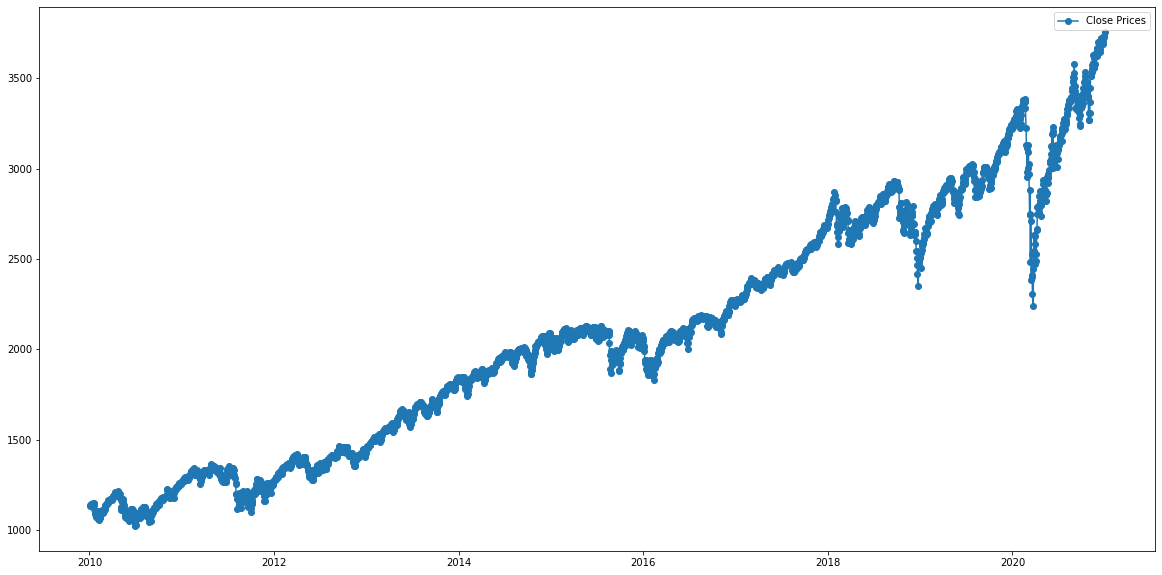

<Figure size 432x288 with 0 Axes>

In [90]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot_date(dates, y, linestyle ='solid')
plt.legend(["Close Prices"])
plt.show()
plt.savefig('plot.png')

## Finding Correlation between features

In [54]:
df = pd.read_csv('sp500_nrm.csv')

In [55]:
df

,date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,-1.423026,-1.407082,-1.412768,-1.399551,-1.399551,0.171451
1,2010-01-05,-1.399168,-1.403010,-1.393262,-1.394319,-1.394319,-1.420387
2,2010-01-06,-1.394649,-1.399232,-1.386874,-1.393400,-1.393400,1.212526
3,2010-01-07,-1.393819,-1.394407,-1.390790,-1.386656,-1.386656,1.528712
4,2010-01-08,-1.387521,-1.390084,-1.383493,-1.381780,-1.381780,0.593914
...,...,...,...,...,...,...,...
2764,2020-12-24,2.396370,2.385036,2.418162,2.409523,2.409523,-2.064643
2765,2020-12-28,2.439343,2.439174,2.468357,2.457394,2.457394,-0.312281
2766,2020-12-29,2.479323,2.462207,2.468774,2.445063,2.445063,-0.463118
2767,2020-12-30,2.458844,2.445253,2.479048,2.452474,2.452474,-0.716092


In [56]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999839,0.999738,0.999600,0.999600,-0.026733
High,0.999839,1.000000,0.999632,0.999768,0.999768,-0.020745
Low,0.999738,0.999632,1.000000,0.999800,0.999800,-0.037105
Close,0.999600,0.999768,0.999800,1.000000,1.000000,-0.029631
Adj Close,0.999600,0.999768,0.999800,1.000000,1.000000,-0.029631
Volume,-0.026733,-0.020745,-0.037105,-0.029631,-0.029631,1.000000


In [57]:
#Dropping Volume 

In [58]:
df.drop(columns=['Volume'], inplace = True)

In [59]:
df

,date,Open,High,Low,Close,Adj Close
0,2010-01-04,-1.423026,-1.407082,-1.412768,-1.399551,-1.399551
1,2010-01-05,-1.399168,-1.403010,-1.393262,-1.394319,-1.394319
2,2010-01-06,-1.394649,-1.399232,-1.386874,-1.393400,-1.393400
3,2010-01-07,-1.393819,-1.394407,-1.390790,-1.386656,-1.386656
4,2010-01-08,-1.387521,-1.390084,-1.383493,-1.381780,-1.381780
...,...,...,...,...,...,...
2764,2020-12-24,2.396370,2.385036,2.418162,2.409523,2.409523
2765,2020-12-28,2.439343,2.439174,2.468357,2.457394,2.457394
2766,2020-12-29,2.479323,2.462207,2.468774,2.445063,2.445063
2767,2020-12-30,2.458844,2.445253,2.479048,2.452474,2.452474


In [61]:
df.to_csv('sp500_nrm.csv', index = False)

In [62]:
!pip install dataframe-image

     |████████████████████████████████| 6.6 MB 5.8 MB/s            
     |████████████████████████████████| 945 kB 45.7 MB/s            
     |████████████████████████████████| 128 kB 68.7 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 270 kB 46.9 MB/s            
     |████████████████████████████████| 191 kB 51.2 MB/s            
     |████████████████████████████████| 159 kB 45.0 MB/s            
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-py3-none-any.whl size=3178 sha256=e5474788012c42dd40d2ca09b758833c56c6abd86169112e861460b6f7b51506
  Stored in directory: /home/amartyadutta/.cache/pip/wheels/6a/f5/9c/f8331a854f7a8739cf0e74c13854e4dd7b1af11b04fe1dde13
Successfully built idna-ssl


In [64]:
import dataframe_image as dfi